


first, count all types in each category and see if there is one that is more common 

compare male/female to scores
compare parent education level to scores
compare lunch to parent education level 
compare race/ethnicity to lunch and/or education level
need to add explanation of groups (race/ethnicty) to README along with grade breakdown 

## Title Here 
Kim Hummel 
10/3/25
The Purpose of this assignment is to provide a unique analysis of the data of my choice. 

I chose data about student demographics and their scores on reading, writing, and math tests. I will look for coorelations between parents' education status, gender, took a test preparation course, and family income and students' test sccores. 

First, we need to import our dependencies and then we will import our data set.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Projects\Repos\datafun-06-eda\StudentsPerformance.csv')

Now we will run a few basic commands to get the general idea of what the data looks like. 

In [3]:
print(df.head(10))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

In [4]:
print(df.shape)

(1000, 8)


This means that there are 1000 rows and 8 columns in this data set. 

In [5]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


This means that in the first five columns, the data type will be strings, while the last three colums are integers. Which means we won't be dealing with any decimals. 

In [6]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


This provides us with some basic statistics of the last three columns, since they are the columns with integers. We will use this along with graphs later to analyze the entire data set. 

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

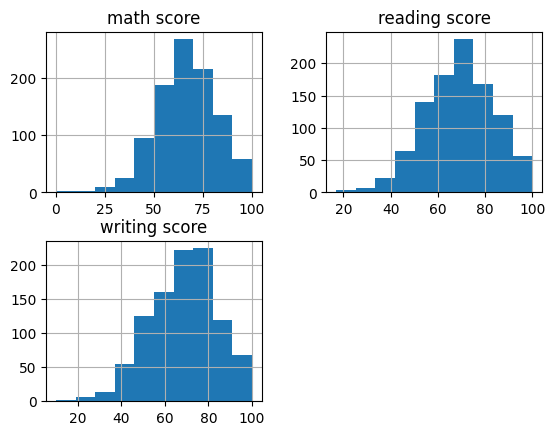

In [7]:
df.hist()

A preliminary look at the data shows that we have data from 1000 students. For all three tests, students could score between 0 and 100. The means ranged between 66 and 69, showing the average score on each test to be similar. Our percentiles and graphs show us that the math scores stay closer to the mean, while the reading and writing scores are spread out, away from the median a little bit more. And the writing scores are skewed more to the right. 

## Adjusting the Data 

Now we will rename the columns that do not math python naming norms. 

In [8]:
df.rename(columns={'parental level of education': 'parental_level_of_education'}, inplace=True)

df.rename(columns={'test preparation course': 'test_preparation_course'}, inplace=True)

df.rename(columns={'math score': 'math_score'}, inplace=True)

df.rename(columns={'reading score': 'reading_score'}, inplace=True)

df.rename(columns={'writing score': 'writing_score'}, inplace=True)

With these cleaner naming convensions we will create a new column. We'll average the reading and writing score to come up with an ELA score, so we can compare ELA to math. 

In [9]:
df['ela_score'] = (df['reading_score'] + df['writing_score']) / 2

In [10]:
print(df.head(5))

   gender race/ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  ela_score  
0                    none          72             72             74       73.0  
1               completed          69             90             88       89.0  
2                    none          90             95             93       94.0  
3                    none          47             57             44       50.5  
4                    none          76             78             75       76.5  


## Data Overview

Know that everything is organzied, we'll make some generalizations about each column. 

In [11]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [12]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [13]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [14]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [15]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

This data gives us some basic outlines for all 1000 students. First, while there are slightly more females in this group, it is close to a 50/50 split. 

Group A is the smalles race/ethnicity group while Group C is the largest race/ethnicity group. And the other races are spread between those values. 

Less than a fifth of the students' parents have a college degree. 

About a 3rd of the school receives free lunch, meaning they come from a low income family. 

And about a third of the students completed a test preparation course. 

## Males vs Females
Now we'll look at the data for how males and females score on the math and ELA sections 

C:\Users\kehum\AppData\Local\Temp\ipykernel_4552\3685566446.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_m_score, female_m_score], labels=['Male ', 'Female'])


Text(0, 0.5, 'Score')

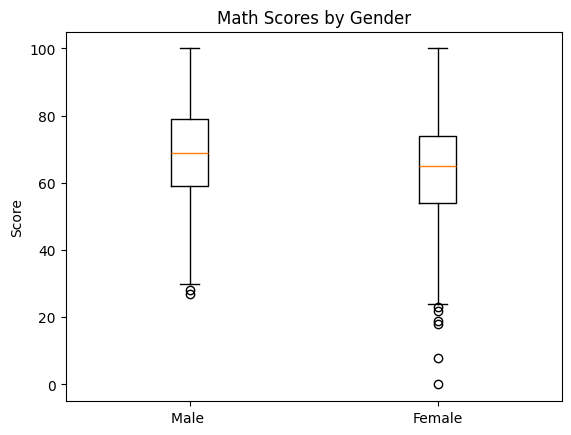

In [16]:
male_m_score = df[df['gender'] == 'male']['math_score']
female_m_score =df[df['gender'] == 'female']['math_score']

plt.boxplot([male_m_score, female_m_score], labels=['Male ', 'Female'])
plt.title('Math Scores by Gender')
plt.ylabel('Score')

C:\Users\kehum\AppData\Local\Temp\ipykernel_4552\2958637086.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_e_score, female_e_score], labels=['Male ', 'Female'])


Text(0, 0.5, 'Score')

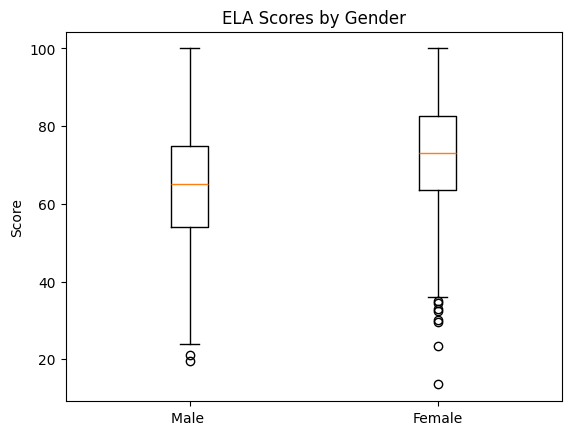

In [17]:

male_e_score = df[df['gender'] == 'male']['ela_score']
female_e_score = df[df['gender'] == 'female']['ela_score']

plt.boxplot([male_e_score, female_e_score], labels=['Male ', 'Female'])
plt.title('ELA Scores by Gender')
plt.ylabel('Score')

Looking at the math table first, we can see that the majority of both male and female students scored in the same range, suggesting that in math males and females have equal ability. There were just more female outliers that scored below the average range, which resulted in their median score being a bit lower. 

For ELA, the female students scored higher overall since their median is higher and their range is smaller, meaning more students scored closer to the median. 

## Test Preparations

Now we'll compare how students did on the ELA and Math sections of the test based on whether or not they attended a test preparation course or not. 

C:\Users\kehum\AppData\Local\Temp\ipykernel_4552\2610572726.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([testprep_score, no_testprep_score], labels=['Completed Test Prep Course', 'Did Not Complete Test Prep Course'])


Text(0, 0.5, 'Score')

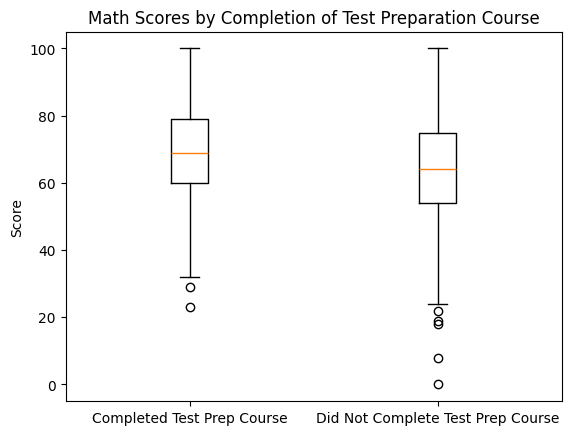

In [18]:
testprep_score = df[df['test_preparation_course'] == 'completed']['math_score']
no_testprep_score =df[df['test_preparation_course'] == 'none']['math_score']

plt.boxplot([testprep_score, no_testprep_score], labels=['Completed Test Prep Course', 'Did Not Complete Test Prep Course'])
plt.title('Math Scores by Completion of Test Preparation Course')
plt.ylabel('Score')

C:\Users\kehum\AppData\Local\Temp\ipykernel_4552\684281566.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([testprep_score, no_testprep_score], labels=['Completed Test Prep Course', 'Did Not Complete Test Prep Course'])


Text(0, 0.5, 'Score')

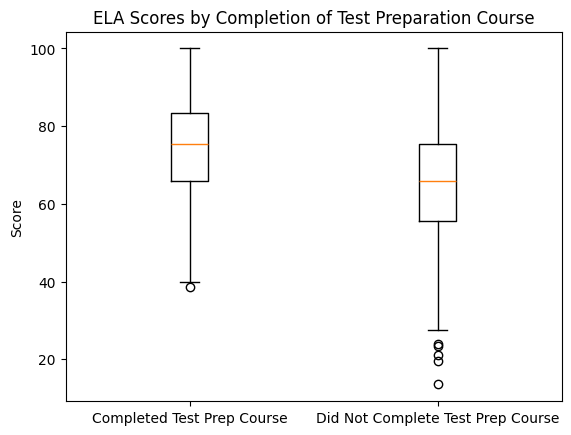

In [19]:
testprep_score = df[df['test_preparation_course'] == 'completed']['ela_score']
no_testprep_score =df[df['test_preparation_course'] == 'none']['ela_score']

plt.boxplot([testprep_score, no_testprep_score], labels=['Completed Test Prep Course', 'Did Not Complete Test Prep Course'])
plt.title('ELA Scores by Completion of Test Preparation Course')
plt.ylabel('Score')

For the math scores, the median and the range between students who did and did not complete the test preparation course is very similar. But there are more lower scoring outliers in the group of students who did not take the test preparation course. 

However, for ELA, students who completed the test prep course scored higher on the ELA test. Not only in the median higher, but the bottom quartile (the lowest scoring 25% of all of the female students) both starts and ends at a higher value than for the category of students who did not take the test prep course. The students that completed the course also did not have as many lower outliers, unlike the the group that did not complete the course. 

## Parent's Highest Level of Education 

The last part of the data that we will be taking a closer look at is compering students whose parents have a minimum of a associates degree, and those students whose parents don't have a completed any college degree. 

C:\Users\kehum\AppData\Local\Temp\ipykernel_4552\2111590414.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([has_score, has_not_score], labels=['Parents With A College Education', 'Parents With No College Education'])


Text(0, 0.5, 'Score')

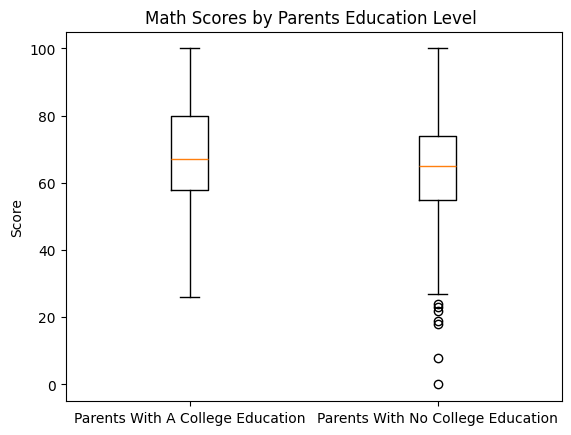

In [20]:
group_type_has = df['parental_level_of_education'].isin(["associate's degree", "bachelor's degree", "associate's degree"])
group_type_hasnot = df['parental_level_of_education'].isin(['some college', 'high school', 'some high school'])

has_score = df[group_type_has]['math_score']
has_not_score = df[group_type_hasnot]['math_score']

plt.boxplot([has_score, has_not_score], labels=['Parents With A College Education', 'Parents With No College Education'])
plt.title('Math Scores by Parents Education Level ')
plt.ylabel('Score')

C:\Users\kehum\AppData\Local\Temp\ipykernel_4552\2689837114.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([has_score, has_not_score], labels=['Parents With A College Education', 'Parents With No College Education'])


Text(0, 0.5, 'Score')

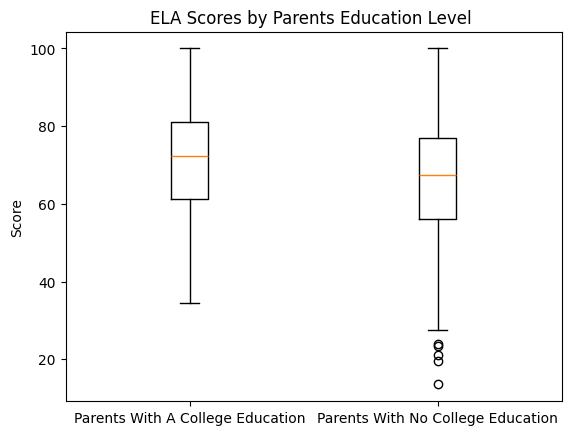

In [21]:
group_type_has = df['parental_level_of_education'].isin(["associate's degree", "bachelor's degree", "associate's degree"])
group_type_hasnot = df['parental_level_of_education'].isin(['some college', 'high school', 'some high school'])

has_score = df[group_type_has]['ela_score']
has_not_score = df[group_type_hasnot]['ela_score']

plt.boxplot([has_score, has_not_score], labels=['Parents With A College Education', 'Parents With No College Education'])
plt.title('ELA Scores by Parents Education Level ')
plt.ylabel('Score')

For both Math and ELA scores, there is not much of a difference between the students whose parents had a college degree of some sort and those whose parents did not have a college degree. The main difference is that there are low outliers for both subjects for students whose parents did not have a college education. But because they are outlies they are not statistically significant. 

## Sumarization 

There were many categories that I could have looked at in this data, but I chose to focus on student gender, whether or not students took a test preparation course, and the education level of students' parents. I attempted to discover how these different characteristics contributed to the students test scores, broken down into Math and ELA. Students gender and parents' leve of education did not seem to play an important role in students' test scores because their median, ranges, and data distribution (how many data points or student scores were in each quartile) are all pretty similar. There are just some lower outliers in specific categories. 

In the math test, students without the test preparation course had a slightly lower median and had a larger spread for it's lower quartile, meaning the lowest 25% of the scores had a large range and reached lower than the lowest quartile of the students who did take a test preparation course. In the ELA test, students who took the test preparation course had a higher median than those who did not take the test preparation course. The minimum score is also higher for student who took the test preparation course. 

In conclusion, students taking a test preparation course contributed the most to students improving test scores. The main difference is that it helped the lowest scoring students obtain a higher score than the lowest scoring students who did not take the preparation course. 